In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv("pima-indians-diabetes.csv", names = ['pregnant', 'plasma', 'pressure', 'thickness', 'lnsulin', 'BMI', 'pedigree', 'age', 'class'])

In [2]:
df.head()

,pregnant,plasma,pressure,thickness,lnsulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   lnsulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,pregnant,plasma,pressure,thickness,lnsulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df[['pregnant', 'class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [6]:
df[['pregnant', 'class']].groupby(['pregnant'], as_index = False).mean().sort_values(by='pregnant', ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


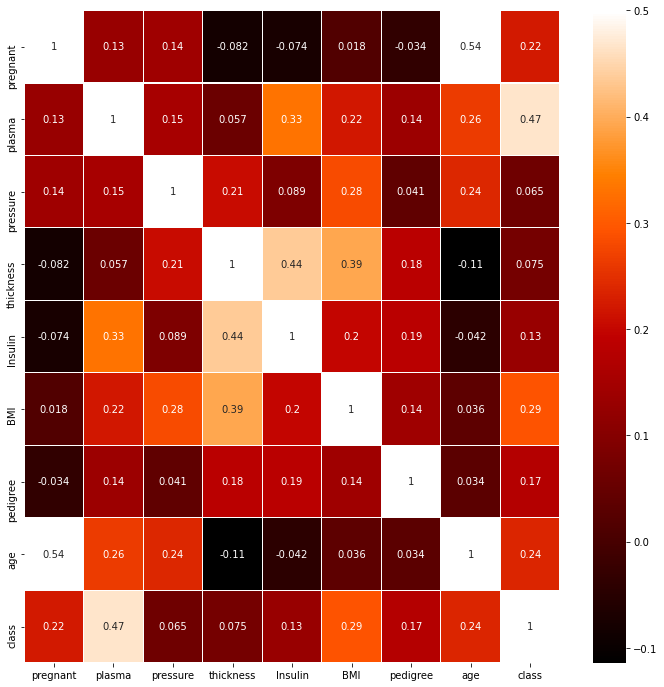

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,12))

sns.heatmap(df.corr(), linewidths=0.1, vmax = 0.5, cmap = plt.cm.gist_heat, linecolor='white', annot = True)

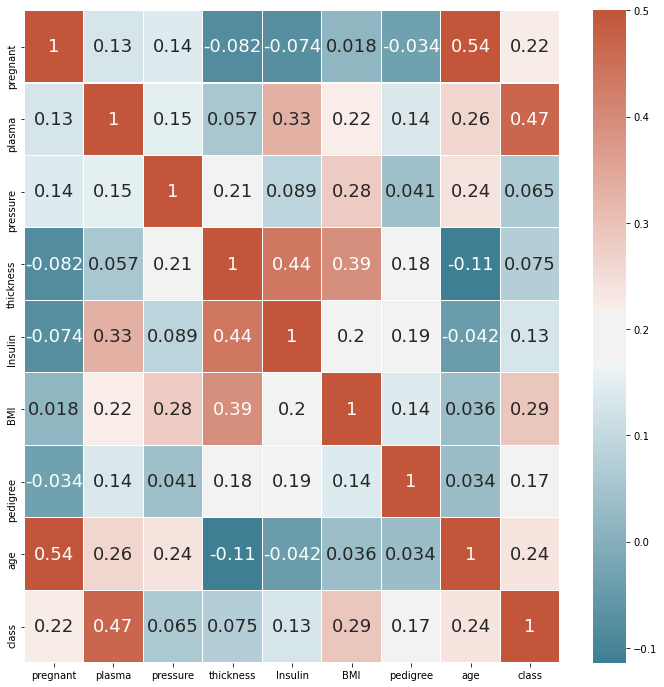

In [8]:
plt.figure(figsize = (12,12))

sns.heatmap(df.corr(), linewidths=0.1, vmax = 0.5, cmap = sns.diverging_palette(220,20,sep=20,as_cmap = True), linecolor='white', annot = True, annot_kws={'size':18})
plt.show()

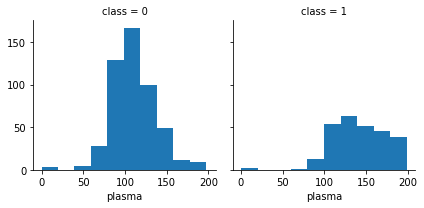

In [9]:
grid = sns.FacetGrid(df, col = 'class') ## 다중 플롯 그리드를 만들어서 여러가지 쌍 관계를 표현하기 위한 그리드 Class이다. 도화지에 축을 나누는것과 같다. 
grid.map(plt.hist, 'plasma', bins = 10)
plt.show()

In [10]:
from keras.models import Sequential
from keras.layers import Dense

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

data = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
X = data[:,0:8]
Y = data[:,8]


In [11]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [12]:
model = Sequential()
model.add(Dense(100,input_dim = 8, activation = 'relu'))
model.add(Dense(100,input_dim = 8, activation = 'relu'))
model.add(Dense(100,input_dim = 8, activation = 'relu'))## 은닉층, 노드갯수 30개, 입력변수 17개
model.add(Dense(1,activation = 'sigmoid')) ## 출력층, 노드갯수 1개
# model.add(Dense(1,activation = 'relu'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X,Y, epochs = 1000, batch_size = 10)

print("\n Accuracy : %.4f"%(model.evaluate(X,Y)[1]))

Epoch 1/1000
77/77 [==============================] - 0s 648us/step - loss: 1.1362 - accuracy: 0.5833
Epoch 2/1000
77/77 [==============================] - 0s 682us/step - loss: 0.7166 - accuracy: 0.6589
Epoch 3/1000
77/77 [==============================] - 0s 708us/step - loss: 0.8173 - accuracy: 0.6224
Epoch 4/1000
77/77 [==============================] - 0s 718us/step - loss: 0.7600 - accuracy: 0.6523
Epoch 5/1000
77/77 [==============================] - 0s 740us/step - loss: 0.6429 - accuracy: 0.6797
Epoch 6/1000
77/77 [==============================] - 0s 698us/step - loss: 0.6627 - accuracy: 0.6758
Epoch 7/1000
77/77 [==============================] - 0s 756us/step - loss: 0.6248 - accuracy: 0.6810
Epoch 8/1000
77/77 [==============================] - 0s 725us/step - loss: 0.6327 - accuracy: 0.6810
Epoch 9/1000
77/77 [==============================] - 0s 740us/step - loss: 0.6004 - accuracy: 0.6953
Epoch 10/1000
77/77 [==============================] - 0s 700us/step - loss: 0.623

77/77 [==============================] - 0s 746us/step - loss: 0.2238 - accuracy: 0.9010
Epoch 160/1000
77/77 [==============================] - 0s 742us/step - loss: 0.2269 - accuracy: 0.9036
Epoch 161/1000
77/77 [==============================] - 0s 758us/step - loss: 0.2111 - accuracy: 0.9089
Epoch 162/1000
77/77 [==============================] - 0s 768us/step - loss: 0.2385 - accuracy: 0.8971
Epoch 163/1000
77/77 [==============================] - 0s 744us/step - loss: 0.2038 - accuracy: 0.9167
Epoch 164/1000
77/77 [==============================] - 0s 714us/step - loss: 0.2166 - accuracy: 0.9076
Epoch 165/1000
77/77 [==============================] - 0s 711us/step - loss: 0.2055 - accuracy: 0.9141
Epoch 166/1000
77/77 [==============================] - 0s 748us/step - loss: 0.2175 - accuracy: 0.9076
Epoch 167/1000
77/77 [==============================] - 0s 736us/step - loss: 0.2823 - accuracy: 0.8776
Epoch 168/1000
77/77 [==============================] - 0s 731us/step - loss: 0

77/77 [==============================] - 0s 796us/step - loss: 0.0928 - accuracy: 0.9714
Epoch 316/1000
77/77 [==============================] - 0s 773us/step - loss: 0.0970 - accuracy: 0.9648
Epoch 317/1000
77/77 [==============================] - 0s 812us/step - loss: 0.0602 - accuracy: 0.9805
Epoch 318/1000
77/77 [==============================] - 0s 720us/step - loss: 0.0637 - accuracy: 0.9844
Epoch 319/1000
77/77 [==============================] - 0s 618us/step - loss: 0.0518 - accuracy: 0.9844
Epoch 320/1000
77/77 [==============================] - 0s 608us/step - loss: 0.0815 - accuracy: 0.9779
Epoch 321/1000
77/77 [==============================] - 0s 619us/step - loss: 0.0989 - accuracy: 0.9596
Epoch 322/1000
77/77 [==============================] - 0s 623us/step - loss: 0.0723 - accuracy: 0.9688
Epoch 323/1000
77/77 [==============================] - 0s 617us/step - loss: 0.0568 - accuracy: 0.9792
Epoch 324/1000
77/77 [==============================] - 0s 621us/step - loss: 0

77/77 [==============================] - 0s 769us/step - loss: 0.0355 - accuracy: 0.9870
Epoch 472/1000
77/77 [==============================] - 0s 765us/step - loss: 0.0306 - accuracy: 0.9935
Epoch 473/1000
77/77 [==============================] - 0s 744us/step - loss: 0.0243 - accuracy: 0.9909
Epoch 474/1000
77/77 [==============================] - 0s 759us/step - loss: 0.0274 - accuracy: 0.9935
Epoch 475/1000
77/77 [==============================] - 0s 744us/step - loss: 0.0172 - accuracy: 0.9961
Epoch 476/1000
77/77 [==============================] - 0s 754us/step - loss: 0.0196 - accuracy: 0.9961
Epoch 477/1000
77/77 [==============================] - 0s 756us/step - loss: 0.0176 - accuracy: 0.9974
Epoch 478/1000
77/77 [==============================] - 0s 722us/step - loss: 0.0724 - accuracy: 0.9688
Epoch 479/1000
77/77 [==============================] - 0s 768us/step - loss: 0.4004 - accuracy: 0.9023
Epoch 480/1000
77/77 [==============================] - 0s 792us/step - loss: 0

77/77 [==============================] - 0s 779us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 628/1000
77/77 [==============================] - 0s 771us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 629/1000
77/77 [==============================] - 0s 747us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 630/1000
77/77 [==============================] - 0s 732us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 631/1000
77/77 [==============================] - 0s 756us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 632/1000
77/77 [==============================] - 0s 739us/step - loss: 0.0114 - accuracy: 0.9961
Epoch 633/1000
77/77 [==============================] - 0s 748us/step - loss: 0.1073 - accuracy: 0.9714
Epoch 634/1000
77/77 [==============================] - 0s 748us/step - loss: 0.4976 - accuracy: 0.8607
Epoch 635/1000
77/77 [==============================] - 0s 740us/step - loss: 0.3303 - accuracy: 0.8919
Epoch 636/1000
77/77 [==============================] - 0s 769us/step - loss: 0

77/77 [==============================] - 0s 784us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 784/1000
77/77 [==============================] - 0s 695us/step - loss: 0.0054 - accuracy: 0.9987
Epoch 785/1000
77/77 [==============================] - 0s 697us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 786/1000
77/77 [==============================] - 0s 680us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 787/1000
77/77 [==============================] - 0s 688us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 788/1000
77/77 [==============================] - 0s 644us/step - loss: 0.0056 - accuracy: 0.9987
Epoch 789/1000
77/77 [==============================] - 0s 684us/step - loss: 0.0062 - accuracy: 1.0000
Epoch 790/1000
77/77 [==============================] - 0s 666us/step - loss: 0.0050 - accuracy: 0.9987
Epoch 791/1000
77/77 [==============================] - 0s 697us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 792/1000
77/77 [==============================] - 0s 685us/step - loss: 0

77/77 [==============================] - 0s 726us/step - loss: 0.5038 - accuracy: 0.8698
Epoch 940/1000
77/77 [==============================] - 0s 731us/step - loss: 0.2763 - accuracy: 0.8880
Epoch 941/1000
77/77 [==============================] - 0s 723us/step - loss: 0.0840 - accuracy: 0.9661
Epoch 942/1000
77/77 [==============================] - 0s 761us/step - loss: 0.0447 - accuracy: 0.9857
Epoch 943/1000
77/77 [==============================] - 0s 765us/step - loss: 0.0222 - accuracy: 0.9974
Epoch 944/1000
77/77 [==============================] - 0s 768us/step - loss: 0.0147 - accuracy: 0.9974
Epoch 945/1000
77/77 [==============================] - 0s 741us/step - loss: 0.0142 - accuracy: 0.9974
Epoch 946/1000
77/77 [==============================] - 0s 721us/step - loss: 0.0154 - accuracy: 0.9974
Epoch 947/1000
77/77 [==============================] - 0s 769us/step - loss: 0.0447 - accuracy: 0.9818
Epoch 948/1000
77/77 [==============================] - 0s 765us/step - loss: 0